In [1]:
# !sudo apt install tesseract-ocr
!pip install pytesseract

     -------------------------------------- 40.8/40.8 KB 114.7 kB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
from PIL import Image
import pytesseract
import numpy as np
import cv2

import matplotlib.pyplot as plt
# %matplotlib inline

C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

In [ ]:
filename = '/content/numplate2.jpg'
img = np.array(Image.open(filename))
text = pytesseract.image_to_string(img)
print("Text in image is:", text)

Text in image is:  

f LO/CP/233

 



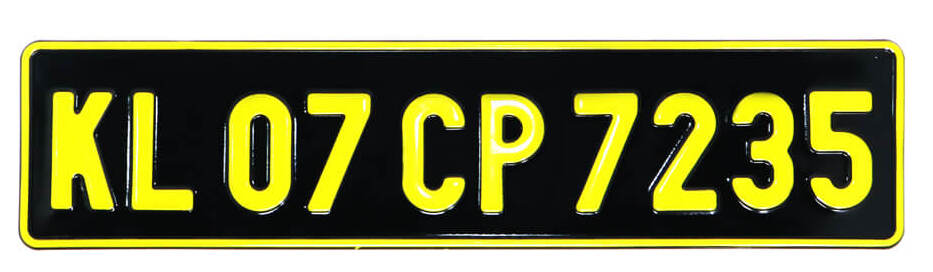

In [ ]:
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/numplate2.jpg')
cv2_imshow(image)
# cv2.waitKey(0)

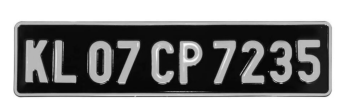

In [ ]:
# grayscaling the image
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray_image)
numplate_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.axis('off')
plt.imshow(numplate_gray, cmap = 'gray');

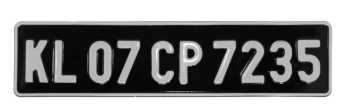

In [ ]:
# De-noising the image using medianblur
numplate_gray_blur = cv2.medianBlur(numplate_gray,3) # kernel size 3
plt.axis('off') 
plt.imshow(numplate_gray_blur, cmap = 'gray');

In [10]:
import os
import cv2
path = 'D:/Datasets/LPI/pipeline/DEEPBLUE_FINAL/yolov5/runs/detect/exp116/crops/character/'
os.listdir(path)

['t4crop.jpg',
 't4crop10.jpg',
 't4crop2.jpg',
 't4crop3.jpg',
 't4crop4.jpg',
 't4crop5.jpg',
 't4crop6.jpg',
 't4crop7.jpg',
 't4crop8.jpg',
 't4crop9.jpg']

In [12]:
image = cv2.imread(path+'t4crop.jpg')
# numplate_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print(pytesseract.image_to_string(image, 
                                  config = f'--psm 9 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

TesseractNotFoundError: /usr/bin/tesseract is not installed or it's not in your PATH. See README file for more information.

In [ ]:
for i in range(3,14):
  print(f'PSM: {i}')
  print(pytesseract.image_to_string(numplate_gray_blur,config = f'--psm {i} --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

PSM: 3
 

 

PSM: 4
 

 

PSM: 5
Ye
co
Qt
hd
ee
=|
ai

PSM: 6
Cy a7ES

PSM: 7
Cy a7ES

PSM: 8
IKL.07CP7235}

PSM: 9
KLO7CP7235

PSM: 10
Cy a7ES

PSM: 11
LO7CP 7235

PSM: 12
LO7CP 7235

PSM: 13
IKL.07CP7235}

